## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  76.522322  1041.082074  0.247650   2.228715  1.330815
1  75.782964  1487.414522  0.759529   8.958682  1.690290
2  97.233085   522.066449  0.719003   6.165728  1.273274
3  16.405195   530.716975  0.350831   7.792513  1.430008
4   1.543795   498.631457  0.697712  10.848489  1.322181


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9664637	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.9595583	total: 70.1ms	remaining: 35s
2:	learn: 0.9507770	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9440474	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9350949	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9276597	total: 72.2ms	remaining: 12s
6:	learn: 0.9196436	total: 72.7ms	remaining: 10.3s
7:	learn: 0.9114729	total: 73.2ms	remaining: 9.07s
8:	learn: 0.9045701	total: 73.6ms	remaining: 8.11s
9:	learn: 0.8976290	total: 74.2ms	remaining: 7.35s
10:	learn: 0.8901882	total: 74.8ms	remaining: 6.72s
11:	learn: 0.8809555	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8744329	total: 75.8ms	remaining: 5.76s
13:	learn: 0.8647969	total: 76.3ms	remaining: 5.38s
14:	learn: 0.8589828	total: 77ms	remaining: 5.05s
15:	learn: 0.8529441	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8461330	total: 77.9ms	remaining: 4.5s
17:	learn: 0.8415368	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8336336	total: 78.7ms	remaining: 4.07s


114:	learn: 0.4219933	total: 119ms	remaining: 914ms
115:	learn: 0.4190193	total: 119ms	remaining: 909ms
116:	learn: 0.4161048	total: 120ms	remaining: 904ms
117:	learn: 0.4133541	total: 120ms	remaining: 898ms
118:	learn: 0.4100252	total: 121ms	remaining: 893ms
119:	learn: 0.4072827	total: 121ms	remaining: 887ms
120:	learn: 0.4042771	total: 121ms	remaining: 882ms
121:	learn: 0.4021975	total: 122ms	remaining: 877ms
122:	learn: 0.4000844	total: 122ms	remaining: 872ms
123:	learn: 0.3976021	total: 123ms	remaining: 866ms
124:	learn: 0.3949337	total: 123ms	remaining: 861ms
125:	learn: 0.3922579	total: 123ms	remaining: 855ms
126:	learn: 0.3896763	total: 124ms	remaining: 850ms
127:	learn: 0.3878049	total: 124ms	remaining: 845ms
128:	learn: 0.3854632	total: 124ms	remaining: 840ms
129:	learn: 0.3828160	total: 125ms	remaining: 836ms
130:	learn: 0.3810256	total: 125ms	remaining: 830ms
131:	learn: 0.3790723	total: 126ms	remaining: 826ms
132:	learn: 0.3772304	total: 126ms	remaining: 822ms
133:	learn: 

269:	learn: 0.1894989	total: 186ms	remaining: 504ms
270:	learn: 0.1887643	total: 187ms	remaining: 502ms
271:	learn: 0.1880261	total: 187ms	remaining: 501ms
272:	learn: 0.1872901	total: 188ms	remaining: 500ms
273:	learn: 0.1864667	total: 188ms	remaining: 498ms
274:	learn: 0.1853576	total: 188ms	remaining: 497ms
275:	learn: 0.1850121	total: 189ms	remaining: 496ms
276:	learn: 0.1842667	total: 189ms	remaining: 495ms
277:	learn: 0.1835372	total: 190ms	remaining: 493ms
278:	learn: 0.1825046	total: 190ms	remaining: 492ms
279:	learn: 0.1817265	total: 191ms	remaining: 490ms
280:	learn: 0.1810582	total: 191ms	remaining: 489ms
281:	learn: 0.1804154	total: 192ms	remaining: 488ms
282:	learn: 0.1800979	total: 192ms	remaining: 487ms
283:	learn: 0.1797894	total: 193ms	remaining: 486ms
284:	learn: 0.1792694	total: 193ms	remaining: 485ms
285:	learn: 0.1789902	total: 194ms	remaining: 483ms
286:	learn: 0.1783786	total: 194ms	remaining: 482ms
287:	learn: 0.1779825	total: 194ms	remaining: 481ms
288:	learn: 

530:	learn: 0.0753533	total: 300ms	remaining: 265ms
531:	learn: 0.0750945	total: 301ms	remaining: 265ms
532:	learn: 0.0749039	total: 301ms	remaining: 264ms
533:	learn: 0.0746810	total: 302ms	remaining: 263ms
534:	learn: 0.0744960	total: 302ms	remaining: 263ms
535:	learn: 0.0742419	total: 303ms	remaining: 262ms
536:	learn: 0.0740738	total: 303ms	remaining: 261ms
537:	learn: 0.0737490	total: 304ms	remaining: 261ms
538:	learn: 0.0734881	total: 304ms	remaining: 260ms
539:	learn: 0.0733246	total: 304ms	remaining: 259ms
540:	learn: 0.0730776	total: 305ms	remaining: 259ms
541:	learn: 0.0728326	total: 305ms	remaining: 258ms
542:	learn: 0.0726427	total: 306ms	remaining: 257ms
543:	learn: 0.0724636	total: 306ms	remaining: 257ms
544:	learn: 0.0722024	total: 307ms	remaining: 256ms
545:	learn: 0.0719668	total: 307ms	remaining: 255ms
546:	learn: 0.0715977	total: 308ms	remaining: 255ms
547:	learn: 0.0713697	total: 308ms	remaining: 254ms
548:	learn: 0.0711808	total: 309ms	remaining: 254ms
549:	learn: 

684:	learn: 0.0514857	total: 368ms	remaining: 169ms
685:	learn: 0.0514336	total: 369ms	remaining: 169ms
686:	learn: 0.0512251	total: 369ms	remaining: 168ms
687:	learn: 0.0511530	total: 370ms	remaining: 168ms
688:	learn: 0.0510187	total: 370ms	remaining: 167ms
689:	learn: 0.0508173	total: 371ms	remaining: 167ms
690:	learn: 0.0507339	total: 371ms	remaining: 166ms
691:	learn: 0.0505388	total: 372ms	remaining: 165ms
692:	learn: 0.0504087	total: 372ms	remaining: 165ms
693:	learn: 0.0503270	total: 372ms	remaining: 164ms
694:	learn: 0.0501387	total: 373ms	remaining: 164ms
695:	learn: 0.0500118	total: 373ms	remaining: 163ms
696:	learn: 0.0499240	total: 374ms	remaining: 163ms
697:	learn: 0.0498438	total: 374ms	remaining: 162ms
698:	learn: 0.0497463	total: 375ms	remaining: 161ms
699:	learn: 0.0495994	total: 375ms	remaining: 161ms
700:	learn: 0.0495209	total: 376ms	remaining: 160ms
701:	learn: 0.0494356	total: 376ms	remaining: 160ms
702:	learn: 0.0493585	total: 377ms	remaining: 159ms
703:	learn: 

941:	learn: 0.0256475	total: 482ms	remaining: 29.7ms
942:	learn: 0.0255382	total: 483ms	remaining: 29.2ms
943:	learn: 0.0254378	total: 483ms	remaining: 28.7ms
944:	learn: 0.0254181	total: 484ms	remaining: 28.2ms
945:	learn: 0.0253716	total: 484ms	remaining: 27.6ms
946:	learn: 0.0253105	total: 485ms	remaining: 27.1ms
947:	learn: 0.0252505	total: 485ms	remaining: 26.6ms
948:	learn: 0.0251666	total: 486ms	remaining: 26.1ms
949:	learn: 0.0251515	total: 486ms	remaining: 25.6ms
950:	learn: 0.0250961	total: 487ms	remaining: 25.1ms
951:	learn: 0.0250146	total: 487ms	remaining: 24.6ms
952:	learn: 0.0249750	total: 487ms	remaining: 24ms
953:	learn: 0.0249172	total: 488ms	remaining: 23.5ms
954:	learn: 0.0248381	total: 488ms	remaining: 23ms
955:	learn: 0.0247608	total: 489ms	remaining: 22.5ms
956:	learn: 0.0246557	total: 489ms	remaining: 22ms
957:	learn: 0.0245969	total: 490ms	remaining: 21.5ms
958:	learn: 0.0245394	total: 490ms	remaining: 21ms
959:	learn: 0.0244640	total: 491ms	remaining: 20.4ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


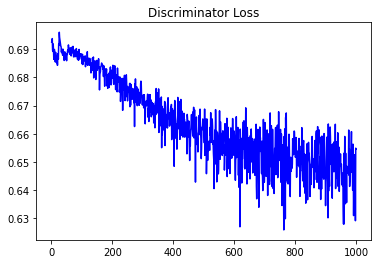

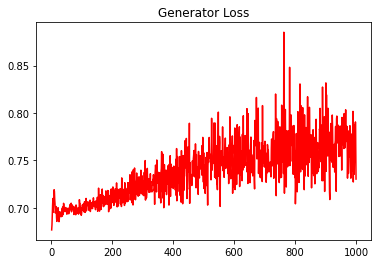

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.371201263575344


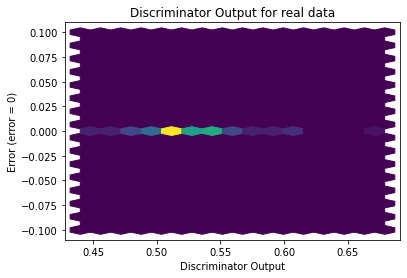

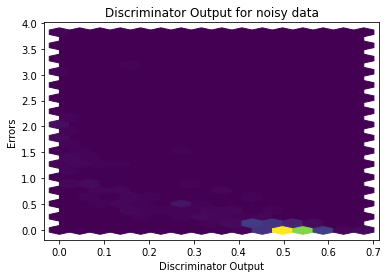

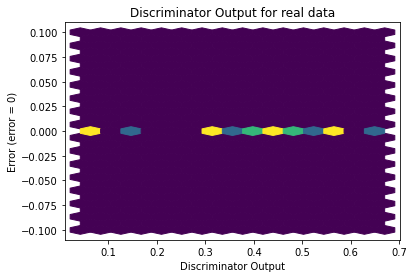

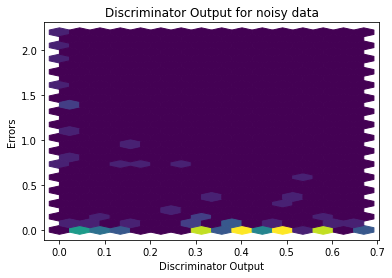

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1527]], requires_grad=True)
